# DIRECT FEEDBACK ALIGNMENT ON MNIST

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
np.random.seed(1234)
%matplotlib inline

Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

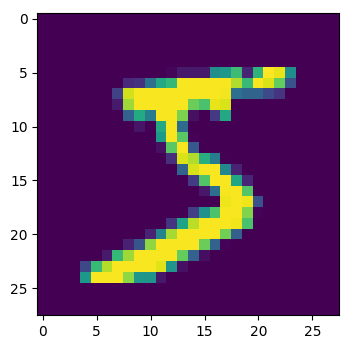

In [6]:
plt.imshow(X_train[0])

In [7]:
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [8]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

print X_train.shape, X_test.shape

(60000, 784) (10000, 784)


In [9]:
y_train[0]

5

In [10]:
nb_classes = 10
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [11]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [12]:
y_train[0, 5]

1.0

In [13]:
from scipy.special import expit

In [14]:
def forward_pass(W1, W2, b1, b2, x):
    '''This is the forward pass. It is equal for any
    training algorithm. It's just one hidden layer
    with tanh activation function and sigmoid on the
    output layer'''
    a1 = np.matmul(W1, x)+b1 # usare np.tile
    h1 = np.tanh(a1)
    a2 = np.matmul(W2, h1)+b2 #usare np.tile
    y_hat = expit(a2)
    return a1, h1, a2, y_hat

In [15]:
input = X_train[0]
input = input[:, np.newaxis]
print input.shape

(784, 1)


In [16]:
W1, W2 = np.random.randn(800, 784), np.random.randn(10, 800)
b1, b2 = np.random.randn(800, 1), np.random.randn(10, 1)

In [17]:
a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, input)

In [18]:
from sklearn.metrics import log_loss

In [19]:
log_loss(y_train[0], y_hat)

7.7855264408909708

In [74]:
def backprop_backward_pass(e, h1, W2, a1, x):
    dW2 = -np.matmul(e, np.transpose(h1))
    da1 = np.matmul(np.transpose(W2), e)*(1-np.tanh(a1)**2)
    dW1 = -np.matmul(da1, np.transpose(x))
    db1 = -da1
    db2 = -e
    return dW1, dW2, db1, db2

In [21]:
e = y_hat - y_train[0][:, np.newaxis]
dW1, dW2, db1, db2 = backprop_backward_pass(e, h1, W2, a1, input)

In [77]:
def train(x, y, n_epochs=10, lr=1e-3, batch_size=200, tol=1e-1):
    x = np.transpose(x)
    y = np.transpose(y)
    
    W1, W2 = np.random.randn(800, 784), np.random.randn(10, 800)
    b1, b2 = np.random.randn(800, 1), np.random.randn(10, 1)
    
    dataset_size = x.shape[1]
    n_batches = dataset_size//batch_size
    
    for i in xrange(n_epochs):
        perm = np.random.permutation(x.shape[1])
        x = x[:, perm]
        y = y[:, perm]
        #plt.imshow(x[:, 0].reshape(28, 28))
        #print np.argmax(y, axis=0)[0]
        loss = 0.
        train_error = 0.
        for j in xrange(n_batches):
            if j%50==0:
                print 'Batch #', j
            samples = x[:, j*batch_size:(j+1)*batch_size]
            targets = y[:, j*batch_size:(j+1)*batch_size]
            a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, samples) #modificare forward_pass e usare np.tile per
            # aggiungere b1 e b2 ---- +np.tile(b1, batch_size)
            error = y_hat - targets
            preds = np.argmax(y_hat, axis=0) 
            truth = np.argmax(targets, axis=0)
            train_error += 1.*np.sum(preds!=truth)
            loss_on_batch = log_loss(targets, y_hat)
            
            dW1, dW2, db1, db2 = backprop_backward_pass(error, h1, W2, a1, samples)
            W1 += lr*dW1
            W2 += lr*dW2
            b2 += lr*error
            b1 += lr*db1
            loss += loss_on_batch
        print 'Loss at epoch', i, ':', loss/x.shape[1]
        print 'Training error:', train_error/x.shape[1]
        if loss <= tol:
            break
    return W1, W2, b1, b2

In [78]:
nW1, nW2, nb1, nb2 = train(X_train, y_train)

Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 0 : 0.683592805046
Training error: 0.219966666667
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 1 : 0.4814483549
Training error: 0.113416666667
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 2 : 0.438704416089
Training error: 0.0918
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 3 : 0.413186203122
Training error: 0.0776
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 4 : 0.396604832907
Training error: 0.0686833333333
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 5 : 0.384245381995
Training error: 0.0619833333333
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 6 : 0.373785547355
Training error: 0.0563333333333
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 7

In [93]:
def dfa_backward_pass(e, h1, B1, a1, x):
    dW2 = -np.matmul(e, np.transpose(h1))
    da1 = np.matmul(B1, e)*(1-np.tanh(a1)**2)
    dW1 = -np.matmul(da1, np.transpose(x))
    db1 = -da1
    db2 = -e
    return dW1, dW2, db1, db2

In [94]:
def dfa_train(x, y, n_epochs=10, lr=1e-3, batch_size=200, tol=1e-1):
    x = np.transpose(x)
    y = np.transpose(y)
    
    W1, W2 = np.random.randn(800, 784), np.random.randn(10, 800)
    b1, b2 = np.random.randn(800, batch_size), np.random.randn(10, batch_size)
    
    B1 = np.random.randn(800, 10)
    dataset_size = x.shape[1]
    n_batches = dataset_size//batch_size
    
    for i in xrange(n_epochs):
        perm = np.random.permutation(x.shape[1])
        x = x[:, perm]
        y = y[:, perm]
        #plt.imshow(x[:, 0].reshape(28, 28))
        #print np.argmax(y, axis=0)[0]
        loss = 0.
        train_error = 0.
        for j in xrange(n_batches):
            if j%50==0:
                print 'Batch #', j
            samples = x[:, j*batch_size:(j+1)*batch_size]
            targets = y[:, j*batch_size:(j+1)*batch_size]
            a1, h1, a2, y_hat = forward_pass(W1, W2, b1, b2, samples)
            error = y_hat - targets
            preds = np.argmax(y_hat, axis=0) 
            truth = np.argmax(targets, axis=0)
            train_error += 1.*np.sum(preds!=truth)
            loss_on_batch = log_loss(targets, y_hat)
            
            dW1, dW2, db1, db2 = dfa_backward_pass(error, h1, B1, a1, samples)
            W1 += lr*dW1
            W2 += lr*dW2
            b2 += lr*error
            b1 += lr*db1
            loss += loss_on_batch
        print 'Loss at epoch', i, ':', loss/x.shape[1]
        print 'Training error:', train_error/x.shape[1]
        if loss <= tol:
            break
    return W1, W2, b1, b2

In [96]:
nW1, nW2, nb1, nb2 = train(X_train, y_train, n_epochs=50, lr=1e-3, batch_size=200, tol=1e-2)

Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 0 : 0.683397809826
Training error: 0.2211
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 1 : 0.476418312413
Training error: 0.111483333333
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 2 : 0.432522037757
Training error: 0.08885
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 3 : 0.408683172545
Training error: 0.0751333333333
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 4 : 0.39164081044
Training error: 0.06635
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 5 : 0.379940137792
Training error: 0.0598666666667
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 6 : 0.370439574007
Training error: 0.05435
Batch # 0
Batch # 50
Batch # 100
Batch # 150
Batch # 200
Batch # 250
Loss at epoch 7 : 0.36252780

In [103]:
def test(W1, W2, test_samples, test_targets):
    test_samples = np.transpose(test_samples)
    test_targets = np.transpose(test_targets)
    b1 = np.zeros((800, 10000))
    b2 = np.zeros((10, 10000))
    outs = forward_pass(W1, W2, b1, b2, test_samples)[-1]
    preds = np.argmax(outs, axis=0) 
    truth = np.argmax(test_targets, axis=0)
    test_error = 1.*np.sum(preds!=truth)/preds.shape[0]
    return test_error

In [104]:
test(nW1, nW2, X_test, y_test)

0.0447